# HDSC Fall 2022 Internship :- Machine Learning Regression: Predicting Energy Efficiency of Buildings.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("energydata_complete.csv")

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## Question 12

In [ ]:
sub = df[["T2", "T6"]]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = sub[["T2"]]

y = sub.drop(["T2"], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
round(r2_score(y_test, model.predict(X_test)), 2)

0.65

## Question 13

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.drop(["date", "lights"], axis=1, inplace=True)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
X = normalised_df.drop(['Appliances'], axis=1)

y = normalised_df["Appliances"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error as mae

In [ ]:
mae_ = mae(y_test, pred)

In [ ]:
round(mae_, 2)

0.01

## Question 14

In [ ]:
import numpy as np

In [ ]:
rss = np.sum(np.square(y_test - pred))

In [ ]:
round(rss, 2)

45.35

## Question 15

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
rmse = np.sqrt(mse(y_test, pred))

In [ ]:
round(rmse, 3)

0.088

## Question 16

In [ ]:
cod = np.corrcoef(y_test, pred)

cod

array([[1.        , 0.38622248],
       [0.38622248, 1.        ]])

## Question 17

In [ ]:
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

In [ ]:
weight_df = get_weights_df(model, X_train, 'Linear_Model_Weight')

In [ ]:
weight_df

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


In [ ]:
weight_df.sort_values('Linear_Model_Weight')

,Features,Linear_Model_Weight
0,RH_2,-0.456698
1,T_out,-0.321860
2,T2,-0.236178
3,T9,-0.189941
4,RH_8,-0.157595
5,RH_out,-0.077671
6,RH_7,-0.044614
7,RH_9,-0.039800
8,T5,-0.015657
9,T1,-0.003281


## Question 18

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rdg_mod = Ridge(alpha=0.4)

In [ ]:
rdg_mod.fit(X_train, y_train)

Ridge(alpha=0.4)

In [ ]:
rdg_pred = rdg_mod.predict(X_test)

In [ ]:
rdg_mse = mse(y_test, rdg_pred)

In [ ]:
rdg_rmse = np.sqrt(rdg_mse)

In [ ]:
round(rdg_rmse, 3)

0.088

## Question 19

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.001)

In [ ]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
lasso_weights_df = get_weights_df(lasso, X_train, 'Lasso_weight')

In [ ]:
lasso_weights_df.head()

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000


In [ ]:
(lasso_weights_df['Lasso_weight']!=0).sum()

4

## Question 20

In [ ]:
las_pred = lasso.predict(X_test)

In [ ]:
las_rmse = np.sqrt(mse(y_test, las_pred))

In [ ]:
round(las_rmse, 3)

0.094

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/Data_for_UCI_named.csv")

In [3]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [5]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
x = df.drop(['stabf'], axis=1)
y = df['stabf']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
y_train_enc = encoder.fit_transform(y_train)

In [10]:
y_test_enc = encoder.transform(y_test)

In [11]:
from sklearn.preprocessing import StandardScaler

In [39]:
ss = StandardScaler()

In [40]:
x_train_ss = ss.fit_transform(x_train)

In [41]:
x_test_ss = ss.transform(x_test)

In [42]:
model = RandomForestClassifier(random_state=1)

In [50]:
model.fit(x_train_ss, y_train_enc)

RandomForestClassifier(random_state=1)

In [51]:
accuracy_score(y_test_enc, model.predict(x_test_ss))

0.9995

In [45]:
model.score(x_test_ss, y_test_enc)

0.9995

In [30]:
import xgboost

In [32]:
from xgboost import XGBClassifier

In [33]:
model2 = XGBClassifier(random_state=1)

In [34]:
model2.fit(x_train_ss, y_train_enc)

XGBClassifier(random_state=1)

In [35]:
accuracy_score(y_test_enc, model2.predict(x_test_ss))

0.9995

In [37]:
model2.score(x_test_ss, y_test_enc)

0.9995

In [53]:
import lightgbm

In [54]:
from lightgbm import LGBMClassifier

In [55]:
model3 = LGBMClassifier(random_state=1)

In [56]:
model3.fit(x_train_ss, y_train_enc)

LGBMClassifier(random_state=1)

In [59]:
accuracy_score(y_test_enc, model3.predict(x_test_ss))

0.9965

In [60]:
from sklearn.ensemble import ExtraTreesClassifier

In [61]:
model4 = ExtraTreesClassifier(random_state=1)

In [62]:
model4.fit(x_train_ss, y_train_enc)

ExtraTreesClassifier(random_state=1)

In [63]:
model4.score(x_test_ss, y_test_enc)

0.9885

In [73]:
import matplotlib.pyplot as plt

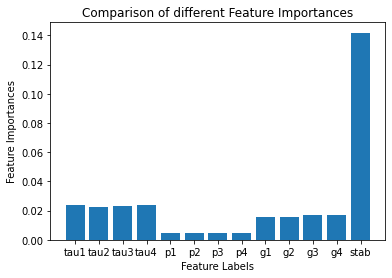

In [74]:
feature_importance = model4.feature_importances_

feature_importance_normalized = np.std([tree.feature_importances_ for tree in model4.estimators_], axis = 0)

plt.bar(x.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()